In [67]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import os
import numpy as np

In [68]:
# tesla_preprocessed_forEmbedding.csv
df = pd.read_csv("data/tesla_preprocessed_forEmbedding.csv")


In [69]:
# prüfen
print(df.head())
print(df.columns)

                          title  \
0   bowl-o-matic™ pick 7-2-2012   
1   bowl-o-matic™ pick 7-6-2012   
2   bowl-o-matic™ pick 7-9-2012   
3  bowl-o-matic™ pick 7-10-2012   
4  bowl-o-matic™ pick 7-12-2012   

                                                text  score  \
0  long slv arna rosg imax ppg algn alxn ddd eqix...     11   
1  long cyh expe v ppg trip ulta crus agp tsla yu...     10   
2  long bud cyh eqix hca sgen ppg disca eqr agp t...      7   
3  long alxn cl bud hfc dtv fdx hca sgen hd cyh e...      6   
4  long cl fdx ups eqt agu cog wprt pot cyh mck m...      6   

               created  
0  2012-06-30 03:41:00  
1  2012-07-06 01:03:00  
2  2012-07-09 14:32:00  
3  2012-07-10 00:47:00  
4  2012-07-12 15:02:00  
Index(['title', 'text', 'score', 'created'], dtype='object')


In [70]:
# text + title kombinieren
df["combined_text"] = df["title"].fillna('') + " " + df["text"].fillna('')

In [71]:
# TF-IDF Vektorisierung
vectorizer = TfidfVectorizer(
    max_features=1000,
    lowercase=True
)
tfidf_matrix = vectorizer.fit_transform(df["combined_text"])
print("TF-IDF Matrix shape:", tfidf_matrix.shape)

TF-IDF Matrix shape: (13268, 1000)


In [72]:
# Feature-Namen anzeigen
feature_names = vectorizer.get_feature_names_out()
print("Beispielhafte Begriffe:", feature_names[:20])

Beispielhafte Begriffe: ['00' '000' '01' '02' '04' '05' '10' '100' '1000' '11' '12' '13' '14' '15'
 '150' '16' '17' '18' '19' '20']


In [73]:
# top begriffe
def print_top_terms(doc_index, top_n=10):
    row = tfidf_matrix[doc_index].tocoo()
    scores = dict(zip([feature_names[i] for i in row.col], row.data))
    top_terms = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    print(f"Top {top_n} Begriffe im Dokument {doc_index}:")
    for term, score in top_terms:
        print(f"{term}: {score:.3f}")

print_top_terms(0)

Top 10 Begriffe im Dokument 0:
swing: 0.686
pick: 0.321
love: 0.290
aapl: 0.288
trade: 0.243
short: 0.201
long: 0.199
day: 0.196
would: 0.191
out: 0.179


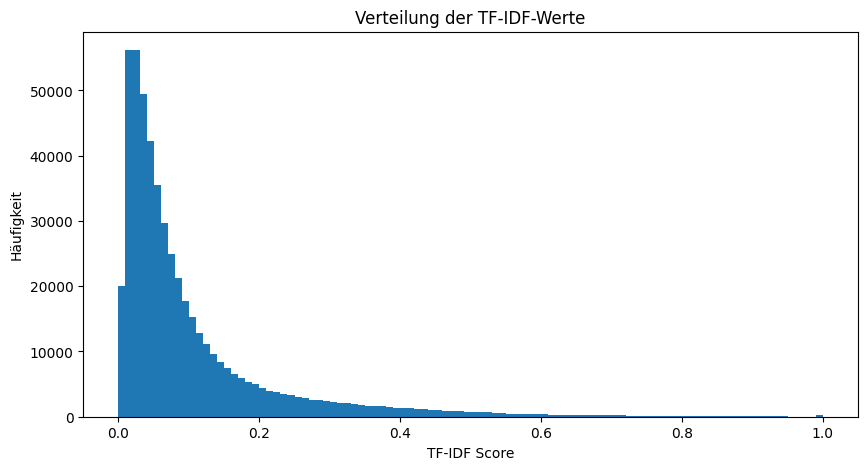

In [76]:
# verteilung zur übersicht plotten
plt.figure(figsize=(10, 5))
plt.hist(tfidf_matrix.data, bins=100)
plt.title("Verteilung der TF-IDF-Werte")
plt.xlabel("TF-IDF Score")
plt.ylabel("Häufigkeit")
plt.show()

In [77]:
# Speicherung als .npy-Datei
# Konvertiere Sparse-Matrix in dichten NumPy-Array
output_dir = "data"
os.makedirs(output_dir, exist_ok=True)

embedding_array = tfidf_matrix.toarray()
np.save(os.path.join(output_dir, "tfidf_embeddings.npy"), embedding_array)

# speicherung der feature namen
np.save(os.path.join(output_dir, "tfidf_feature_names.npy"), feature_names)

print("TF-IDF-Embeddings gespeichert als: data/tfidf_embeddings.npy")
print("Feature-Namen gespeichert als: data/tfidf_feature_names.npy")

TF-IDF-Embeddings gespeichert als: data/tfidf_embeddings.npy
Feature-Namen gespeichert als: data/tfidf_feature_names.npy
